In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df=pd.read_csv('bank_marketing_part1_Data.csv')
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [13]:
## There are no null values found in this data type as per above information of the data

In [6]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(210, 7)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [10]:
df.count()

spending                        210
advance_payments                210
probability_of_full_payment     210
current_balance                 210
credit_limit                    210
min_payment_amt                 210
max_spent_in_single_shopping    210
dtype: int64

In [11]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

<AxesSubplot:xlabel='probability_of_full_payment'>

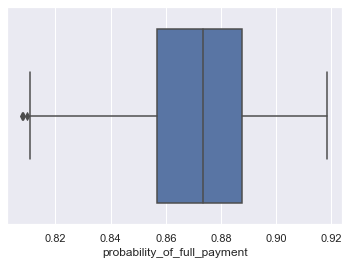

In [12]:
sns.boxplot(x=df['probability_of_full_payment'])

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

spending                        5.035000
advance_payments                2.265000
probability_of_full_payment     0.030875
current_balance                 0.717500
credit_limit                    0.617750
min_payment_amt                 2.207250
max_spent_in_single_shopping    0.832000
dtype: float64


In [14]:
df = df[~((df<(Q1-1.5*IQR)) |(df > (Q3 + 1.5*IQR))).any(axis=1)]
df.shape

(205, 7)

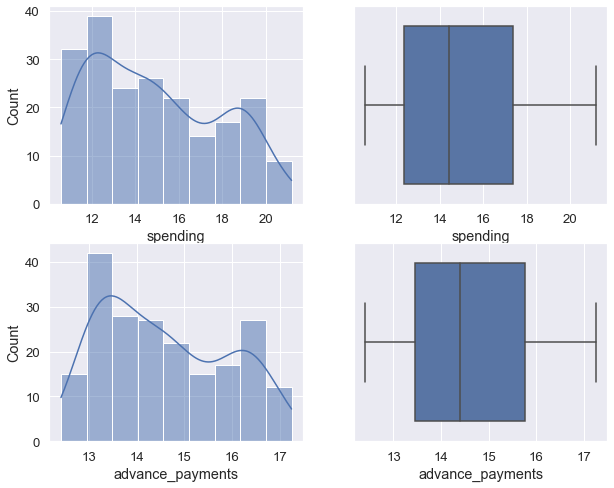

In [145]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['spending'], kde=True, ax=axes[0][0])
sns.boxplot(x='spending', data=df, ax=axes[0][1])
sns.histplot(df['advance_payments'] , kde=True, ax=axes[1][0])
sns.boxplot(x='advance_payments', data=df , ax=axes[1][1])
plt.show()

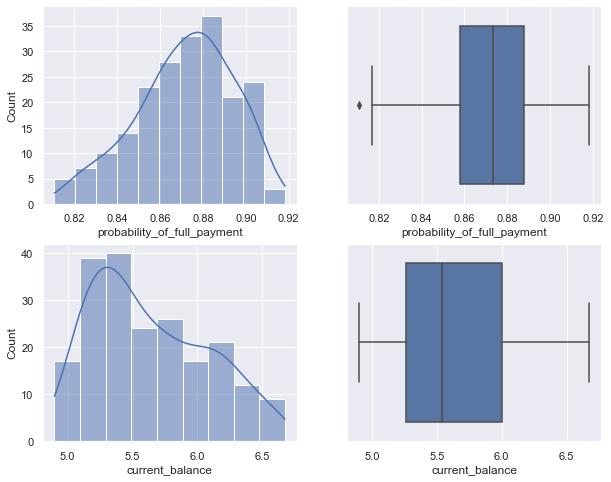

In [15]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['probability_of_full_payment'], kde=True, ax=axes[0][0])
sns.boxplot(x='probability_of_full_payment', data=df, ax=axes[0][1])
sns.histplot(df['current_balance'] , kde=True, ax=axes[1][0])
sns.boxplot(x='current_balance', data=df , ax=axes[1][1])
plt.show()

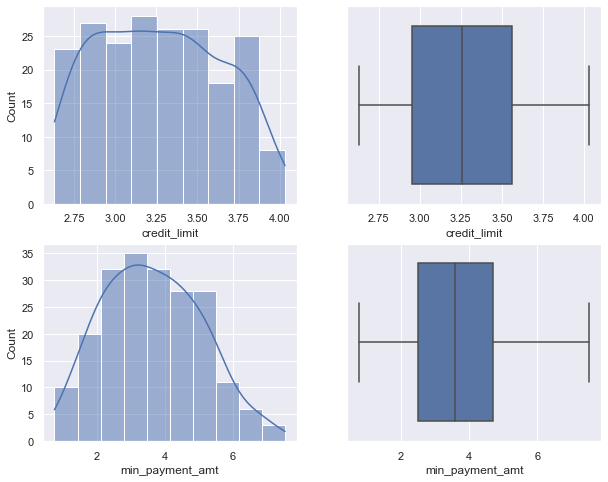

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['credit_limit'], kde=True, ax=axes[0][0])
sns.boxplot(x='credit_limit', data=df, ax=axes[0][1])
sns.histplot(df['min_payment_amt'] , kde=True, ax=axes[1][0])
sns.boxplot(x='min_payment_amt', data=df , ax=axes[1][1])
plt.show()

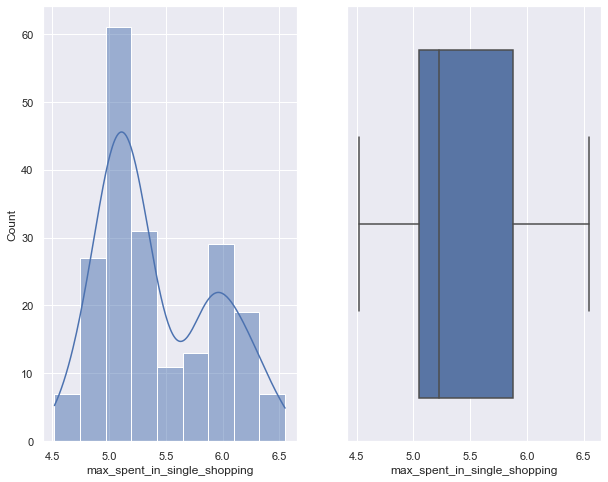

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['max_spent_in_single_shopping'], kde=True, ax=axes[0])
sns.boxplot(x='max_spent_in_single_shopping', data=df, ax=axes[1])
plt.show()

0.25677836634137463
-1.178623844148341


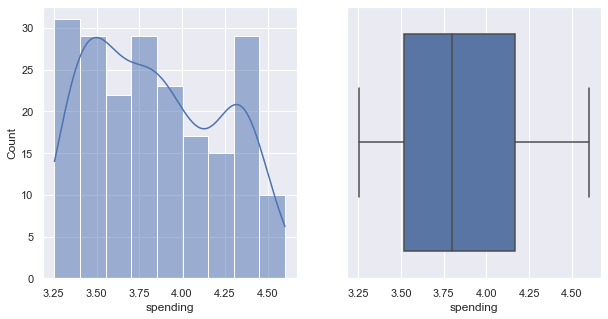

In [18]:
print(np.sqrt(df['spending']).skew())
print(np.sqrt(df['spending']).kurtosis())

fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(np.sqrt(df['spending']), kde=True, ax = axs[0])
sns.boxplot(x=np.sqrt(df['spending']), ax = axs[1])
plt.show()

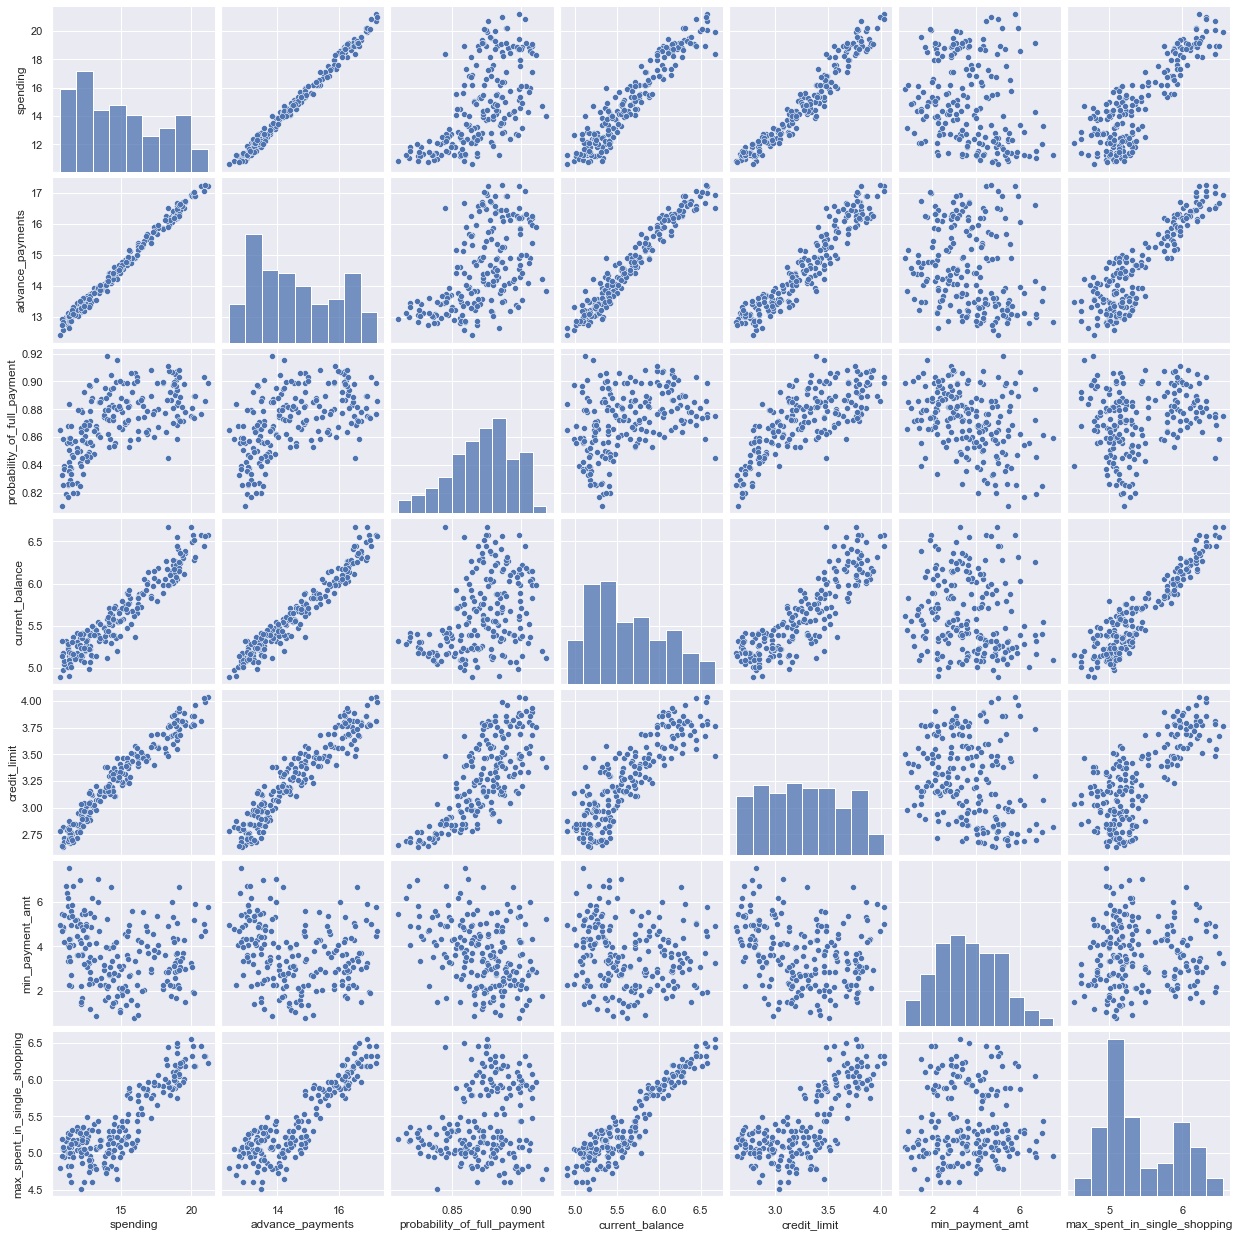

In [19]:
sns.pairplot(df)

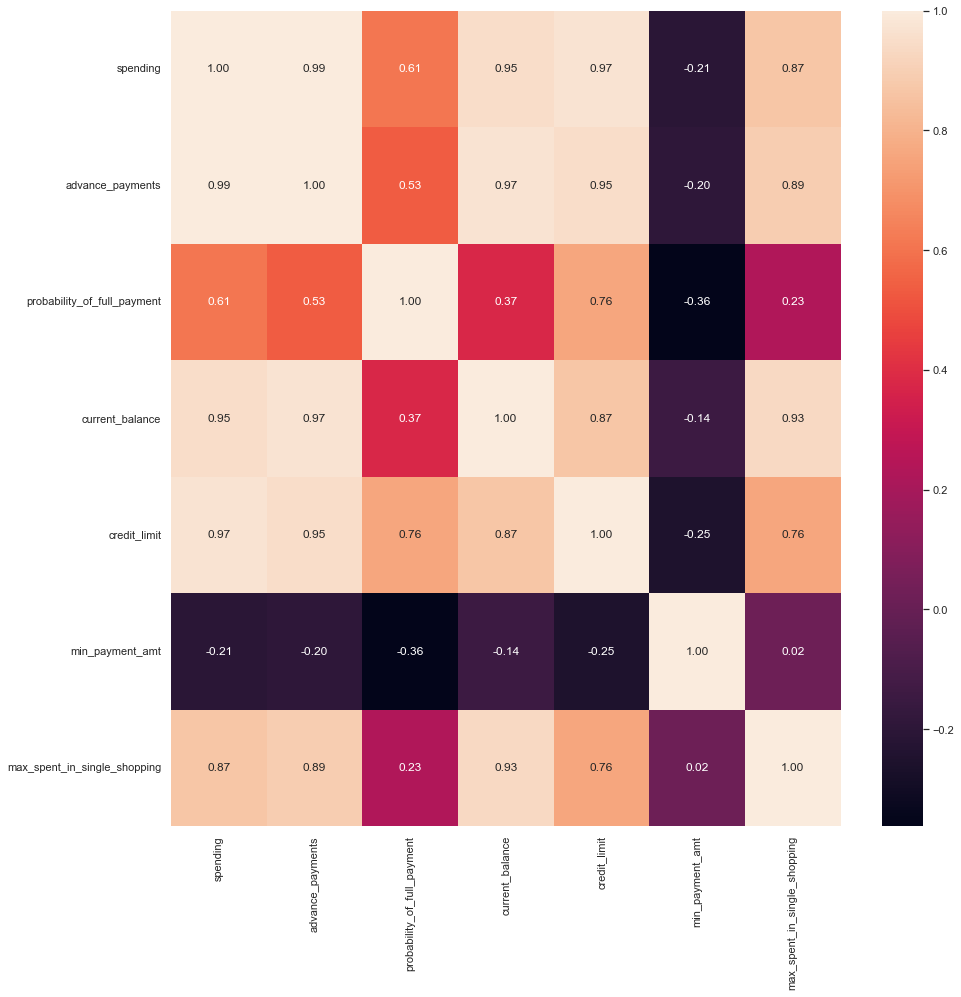

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

In [21]:
from scipy.stats import zscore
data_scaled=df.apply(zscore)
data_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.731064,1.786485,0.153099,2.338151,1.321161,-0.268768,2.297590
1,0.370598,0.232557,1.535786,-0.615423,0.838165,-0.210350,-0.546742
2,1.390086,1.403744,0.494339,1.376889,1.299814,-0.188096,1.484346
4,1.059441,0.975074,1.216705,0.570959,1.137036,-1.092173,0.855194
6,-0.996757,-0.961594,-0.950392,-0.644689,-1.221907,0.439889,-0.214970


In [22]:
data_scaled.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,9.003638e-17,-8.610998e-16,2.887121e-15,6.000620e-16,4.912737e-16,3.021973e-16,-5.085363e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-1.489280e+00,-1.665838e+00,-2.705342e+00,-1.659980e+00,-1.702234e+00,-1.998266e+00,-1.811114e+00
25%,-8.796532e-01,-8.697367e-01,-6.135839e-01,-8.405431e-01,-8.323076e-01,-7.889594e-01,-7.470182e-01
50%,-1.667001e-01,-1.501838e-01,7.775997e-02,-2.147096e-01,-2.642453e-02,-3.648942e-02,-3.768100e-01
75%,8.424557e-01,8.985262e-01,7.159235e-01,8.140888e-01,7.874640e-01,7.396256e-01,9.401599e-01
max,2.158147e+00,2.039094e+00,2.063158e+00,2.338151e+00,2.041653e+00,2.702167e+00,2.297590e+00


In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
wardlink = linkage(data_scaled, method = 'ward')

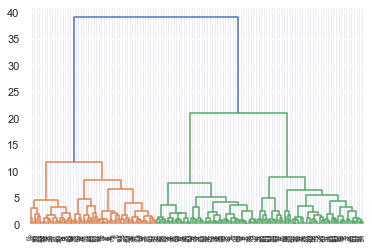

In [25]:
dend = dendrogram(wardlink)

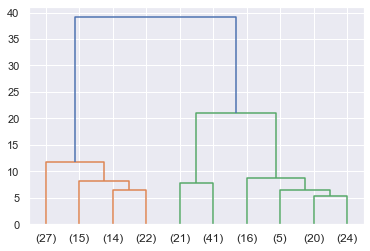

In [27]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [28]:
from scipy.cluster.hierarchy import fcluster

In [29]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 1, 2, 3, 1, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2,
       3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 2, 2,
       3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1, 1, 3,
       1, 3, 3, 2, 1, 1, 2, 1, 3, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1,
       3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 2,
       2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 1,
       1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 1, 3, 3, 3, 2,
       3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 3, 1, 2,
       3, 2, 3, 3, 1, 1, 3, 1, 3, 3, 3, 2, 1, 3, 1, 1, 2, 1, 2, 3, 1, 3,
       2, 1, 3, 1, 3, 1, 1], dtype=int32)

In [30]:
df['clusters'] = clusters

C:\Users\HP\AppData\Local\Temp/ipykernel_5492/1600189321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = clusters


In [31]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2


In [32]:
df.clusters.value_counts().sort_index()

1    78
2    62
3    65
Name: clusters, dtype: int64

In [33]:
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.068333,16.025385,0.882250,6.123154,3.644641,3.602051,5.967795,78
2,11.894355,13.267419,0.848218,5.243806,2.849452,4.853484,5.122581,62
3,14.009077,14.117077,0.881582,5.426692,3.214954,2.523234,5.028246,65


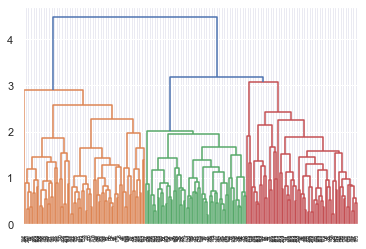

In [35]:
wardlink_1=linkage(data_scaled,method='average')
dend_1=dendrogram(wardlink_1)

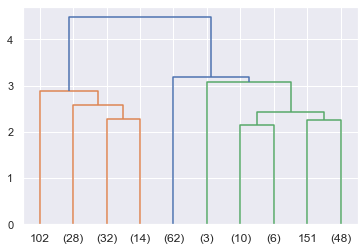

In [36]:
dend_1=dendrogram(wardlink_1,
                 truncate_mode='lastp',
                 p=10,
                 )

In [37]:
from scipy.cluster.hierarchy import fcluster

In [38]:
clusters_average=fcluster(wardlink_1,3, criterion='maxclust')
clusters_average

array([1, 3, 1, 1, 2, 3, 1, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2,
       3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 2, 2,
       3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1, 1, 3,
       1, 3, 3, 2, 1, 1, 2, 1, 3, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1,
       3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 2,
       2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 1,
       1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 1, 3, 3, 3, 2,
       3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 3, 3, 2,
       3, 2, 3, 3, 1, 1, 3, 1, 3, 3, 3, 2, 1, 3, 1, 1, 2, 1, 2, 3, 3, 3,
       2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [39]:
df['clusters_average'] = clusters

C:\Users\HP\AppData\Local\Temp/ipykernel_5492/1090306493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters_average'] = clusters


In [40]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,clusters_average
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2,2


In [41]:
df.clusters_average.value_counts().sort_index()

1    78
2    62
3    65
Name: clusters_average, dtype: int64

In [42]:
from sklearn.cluster import KMeans 

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
X = StandardScaler()

In [45]:
scaled_df = X.fit_transform(df)

In [46]:
scaled_df

array([[ 1.73106382,  1.7864851 ,  0.15309873, ...,  2.2975898 ,
        -1.1246354 , -1.1246354 ],
       [ 0.37059783,  0.2325571 ,  1.53578646, ..., -0.54674162,
         1.27692977,  1.27692977],
       [ 1.39008627,  1.40374421,  0.49433897, ...,  1.48434568,
        -1.1246354 , -1.1246354 ],
       ...,
       [-0.30446885, -0.3262446 ,  0.34809315, ..., -0.83602995,
         1.27692977,  1.27692977],
       [ 0.41537266,  0.31676009,  1.25215821, ...,  0.05813398,
        -1.1246354 , -1.1246354 ],
       [ 0.22594068,  0.43158236, -0.84403185, ...,  0.94015994,
        -1.1246354 , -1.1246354 ]])

In [47]:
k_means = KMeans(n_clusters = 3,random_state=10)

In [48]:
k_means.fit(scaled_df)

KMeans(n_clusters=3, random_state=10)

In [49]:
k_means.labels_

array([2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 2, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2,
       1, 0, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0,
       0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2,
       2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0,
       1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 0,
       1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1,
       0, 2, 1, 2, 1, 2, 2])

In [50]:
wss =[] 

In [51]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
wss

[1845.000000000001,
 760.103499406885,
 443.858462417407,
 369.00867319785317,
 330.97778314971134,
 296.9743322325589,
 267.4354703993147,
 244.74604403198592,
 232.91587716586068,
 211.48301922780288]

In [53]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.5134820040459073

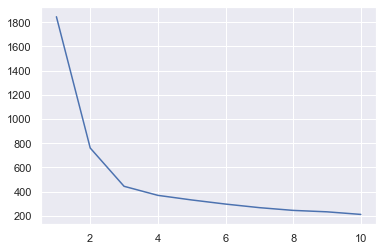

In [55]:
plt.plot(range(1,11), wss)

In [56]:
df["Clus_kmeans"] = labels
df.head(5)

C:\Users\HP\AppData\Local\Temp/ipykernel_5492/3592488927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clus_kmeans"] = labels


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,clusters_average,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2,2,1


In [57]:
df.Clus_kmeans.value_counts().sort_index()

0    76
1    65
2    64
Name: Clus_kmeans, dtype: int64

In [58]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,clusters_average,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2,2,1


In [59]:
aggdata=df.groupby('Clus_kmeans').mean()
aggdata['Freq']=df.Clus_kmeans.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,clusters_average,Freq
Clus_kmeans,,,,,,,,,,
0,18.167763,16.065263,0.883011,6.133868,3.657671,3.591105,5.984118,1.000000,1.000000,76
1,11.960923,13.303538,0.848149,5.257292,2.856677,4.787277,5.129646,1.984615,1.984615,65
2,14.049375,14.132500,0.882333,5.430609,3.222703,2.527956,5.026625,3.000000,3.000000,64


## Problem 2: CART-RF-ANN

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.



In [60]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [61]:
df1=pd.read_csv('insurance_part2_data.csv')
df1

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [62]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [63]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [65]:
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [66]:
df1.duplicated().sum()

139

In [67]:
df1.shape

(3000, 10)

In [68]:
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [70]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
## Duplicates

In [71]:
duplicate_rows_df1 = df1[df1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df1.shape)

number of duplicate rows:  (139, 10)


In [21]:
## Removing Duplicates

In [72]:
df1.drop_duplicates(inplace=True)

In [73]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df1.shape)

Number of duplicate rows = 0
(2861, 10)


In [26]:
## Checking for Outliers

<AxesSubplot:>

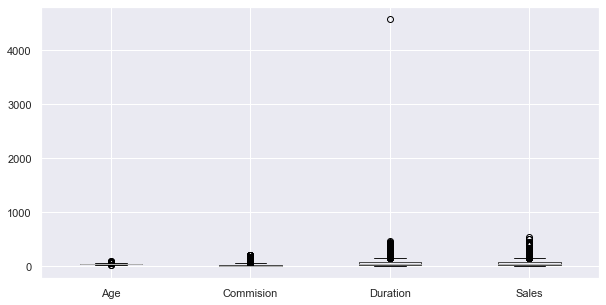

In [74]:
plt.figure(figsize=(10,5))
df1[['Age','Commision', 'Duration', 'Sales']].boxplot()

In [28]:
## Checking pairwise distribution of the continuous variables

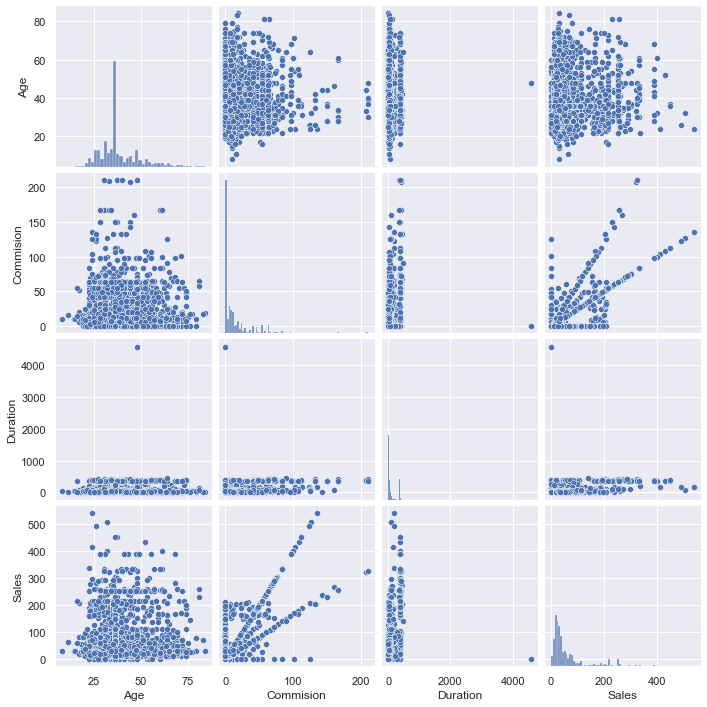

In [75]:
sns.pairplot(df1[['Age','Commision', 'Duration', 'Sales']])


In [65]:
## Checking for Correlations

<AxesSubplot:>

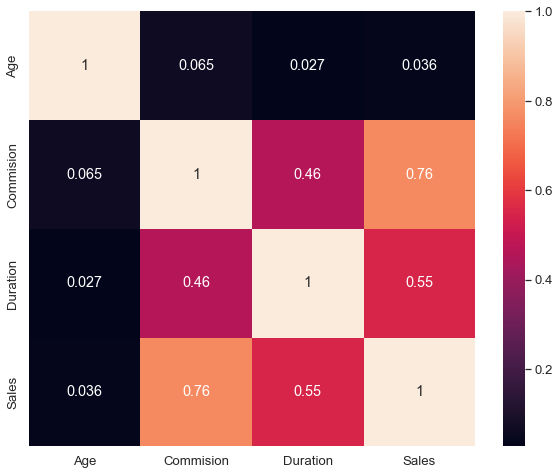

In [76]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df1[['Age','Commision', 'Duration', 'Sales']].corr(), annot=True)

In [32]:
## Converting all objects to categorical codes

In [77]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


In [79]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [80]:
# Proportion of 1s and 0s
df1.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

#### There is no issue of class imbalance here as we have reasonable proportions in both the classes

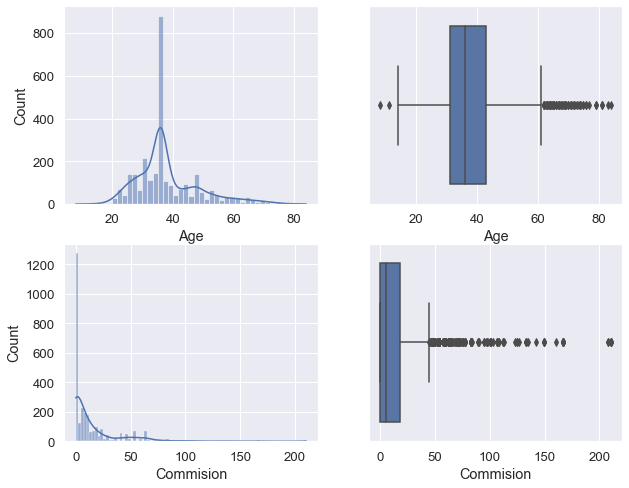

In [81]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df1['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df1, ax=axes[0][1])
sns.histplot(df1['Commision'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Commision', data=df1 , ax=axes[1][1])
plt.show()

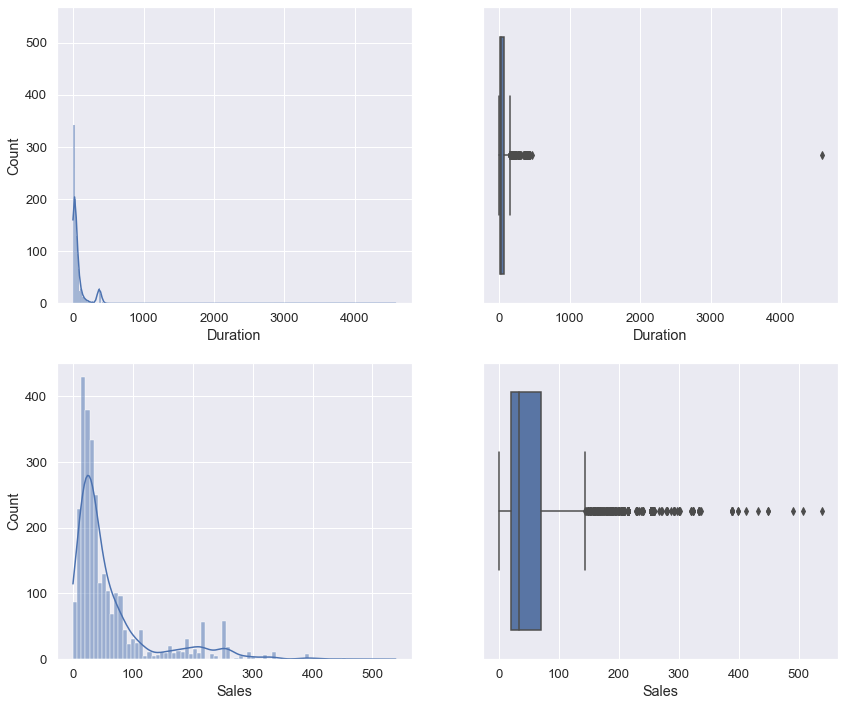

In [82]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(14,12)
sns.histplot(df1['Duration'], kde=True, ax=axes[0][0])
sns.boxplot(x='Duration', data=df1, ax=axes[0][1])
sns.histplot(df1['Sales'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Sales', data=df1 , ax=axes[1][1])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

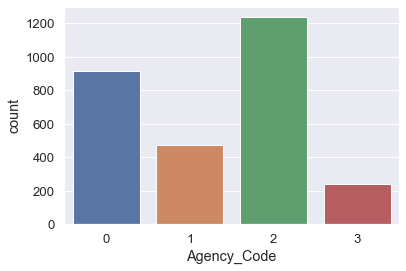

In [83]:
sns.countplot(df1['Agency_Code'])

In [45]:
## 0 represent C2B 
## 1 represent CWT
## 2 represent EPX
## 3 represent JZI

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

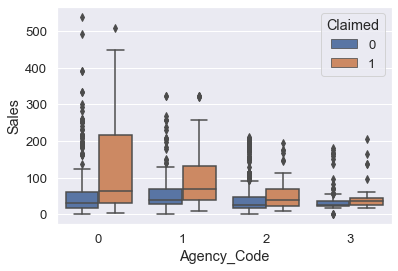

In [84]:
sns.boxplot(data=df1,x='Agency_Code',y='Sales', hue= 'Claimed')

<AxesSubplot:xlabel='Type', ylabel='count'>

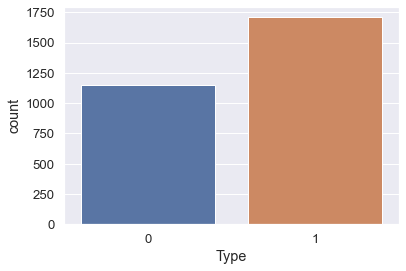

In [85]:
sns.countplot(data=df1,x='Type')

In [75]:
# 0 represents Airlines
# 1 represents Travel Agency

<AxesSubplot:xlabel='Type', ylabel='Sales'>

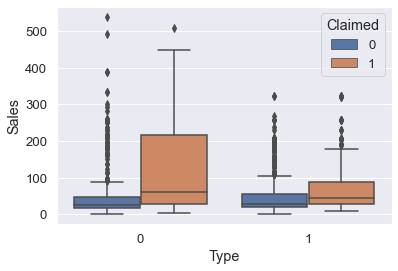

In [86]:
sns.boxplot(data=df1,x="Type", y="Sales", hue="Claimed")

In [77]:
# 0 represents Airlines
# 1 represents Travel Agency

<AxesSubplot:xlabel='Channel', ylabel='count'>

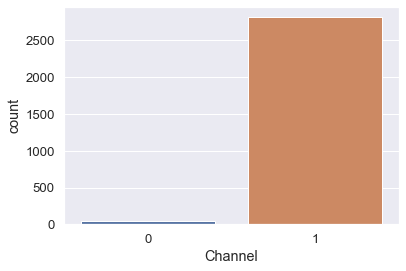

In [87]:
sns.countplot(data=df1,x='Channel')

In [79]:
# 0 represents Offline
# 1 represents Online

<AxesSubplot:xlabel='Product Name', ylabel='count'>

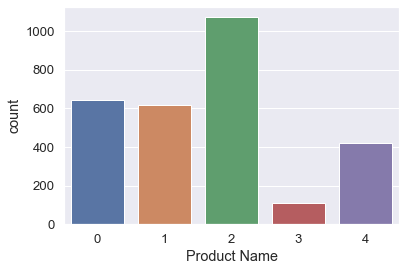

In [88]:
sns.countplot(data=df1,x='Product Name')

In [55]:
# 0 represents Cancellation Plan
# 1 represents Bronze Plan
# 2 represents Customized Plan
# 3 represents Gold Plan
# 4 represents Silver Plan

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network
### Extracting the target column into separate vectors for training set and test set

In [89]:
X = df1.drop("Claimed", axis=1)

y = df1.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


### Splitting data into training and test set


In [90]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


### Checking the dimensions of the training and test data


In [91]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


### Building a Decision Tree Classifier


In [92]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [93]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [94]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                   Imp
Age           0.196222
Agency_Code   0.167038
Type          0.001543
Commision     0.086152
Channel       0.003908
Duration      0.269878
Sales         0.219212
Product Name  0.030343
Destination   0.025703


In [95]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
     'max_depth': [4,5,6],
     'min_samples_leaf': [20,40,60,70],
     'min_samples_split': [150,200,250,300]
}
dt_model=DecisionTreeClassifier()

grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=10)

In [96]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_leaf': [20, 40, 60, 70],
                         'min_samples_split': [150, 200, 250, 300]})

## Best Grid

In [97]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 200}


DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=200)

## Regularising the Decision Tree
## Adding Tuning Parameters

In [98]:
reg_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=20, min_samples_split=150)

In [99]:
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=150)

In [214]:
train_char_label = ['No', 'Yes']
insurance_prediction_tree_regularized = open('C:/Users/ganesh.thakare/insurance_prediction.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=insurance_prediction_tree_regularized, feature_names = list(X_train), class_names = list(train_char_label))

insurance_prediction_tree_regularized.close()
dot_data

## Variable Importance

In [100]:
print(pd.DataFrame(reg_dt_model.feature_importances_,columns=['Imp'],
                    index=X_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.590108
Sales         0.299713
Product Name  0.046541
Commision     0.044548
Duration      0.019090
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


## Predicting on Training dataset for Decision Tree

In [101]:
ytrain_predict_dt = reg_dt_model.predict(X_train)

In [102]:
ytest_predict_dt = reg_dt_model.predict(X_test)

## Model 2

In [103]:
df2=pd.read_csv('insurance_part2_data.csv')
df2

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [104]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [105]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [106]:
for feature in df2[['Age','Commision','Duration','Sales']]:
    lr,ur=treat_outlier(df2[feature])
    df2[feature]=np.where(df2[feature]>ur,ur,df2[feature])
    df2[feature]=np.where(df2[feature]<lr,lr,df2[feature])

## BOX PLOT TO CHECK PRESENCE OF OUTLIERS

<AxesSubplot:>

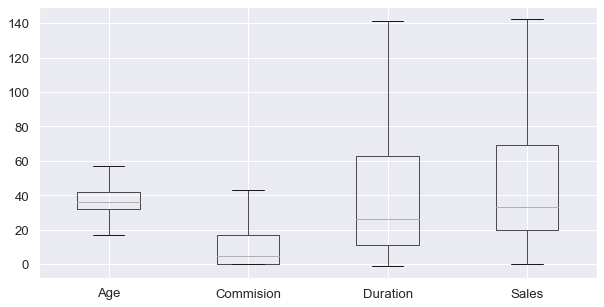

In [107]:
plt.figure(figsize=(10,5))
df2[['Age','Commision', 'Duration', 'Sales']].boxplot()

## RANDOM FOREST CLASSIFIER

In [108]:
X_rf = df2.drop("Claimed", axis=1)

y_rf = df2.pop("Claimed")

X_rf.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,C2B,Airlines,0.70,Online,7.0,2.51,Customised Plan,ASIA
1,36.0,EPX,Travel Agency,0.00,Online,34.0,20.00,Customised Plan,ASIA
2,39.0,CWT,Travel Agency,5.94,Online,3.0,9.90,Customised Plan,Americas
3,36.0,EPX,Travel Agency,0.00,Online,4.0,26.00,Cancellation Plan,ASIA
4,33.0,JZI,Airlines,6.30,Online,53.0,18.00,Bronze Plan,ASIA


In [109]:
X_train, X_test, train_labels, test_labels = train_test_split(X_rf, y_rf, test_size=.30, random_state=1)

In [110]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [111]:
df2.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   float64
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Commision     3000 non-null   float64
 4   Channel       3000 non-null   int8   
 5   Duration      3000 non-null   float64
 6   Sales         3000 non-null   float64
 7   Product Name  3000 non-null   int8   
 8   Destination   3000 non-null   int8   
dtypes: float64(4), int8(5)
memory usage: 108.5 KB


In [113]:
df2=pd.read_csv('insurance_part2_data.csv')
df2

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [114]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [115]:
X_rf = df2.drop("Claimed", axis=1)

y_rf = df2.pop("Claimed")

X_rf.head()

X_train, X_test, train_labels, test_labels = train_test_split(X_rf, y_rf, test_size=.30, random_state=1)

In [116]:
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6, random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

In [117]:
rfcl

RandomForestClassifier(max_features=6, random_state=1)

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid_rfcl = {
    'max_depth': [6],
    'max_features': [4],
    'min_samples_leaf': [8],
    'min_samples_split': [45],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 10)

In [119]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 150}

In [120]:
best_grid.predict

<bound method BaseDecisionTree.predict of DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=200)>

In [122]:
best_grid = grid_search.best_estimator_

In [448]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Model 3

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [124]:
dfsc=pd.read_csv('insurance_part2_data.csv')
dfsc

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [125]:
for feature in dfsc.columns: 
    if dfsc[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(dfsc[feature].unique()))
        print(pd.Categorical(dfsc[feature].unique()).codes)
        dfsc[feature] = pd.Categorical(dfsc[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [126]:
X_sc = dfsc.drop("Claimed", axis=1)

y_sc = dfsc.pop("Claimed")

X_sc.head()

X_train, X_test, train_labels, test_labels = train_test_split(X_sc, y_sc, test_size=.30, random_state=1)

In [127]:
sc=StandardScaler()

In [128]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## MLP Classifier

In [129]:
clf = MLPClassifier(hidden_layer_sizes=(100),max_iter=5000, solver='sgd', verbose=True,random_state=21,tol=0.01)

## TRAINING THE MODEL

In [290]:
clf.fit(X_train,train_labels)

Iteration 1, loss = 3.25269999
Iteration 2, loss = 0.94805436
Iteration 3, loss = 1.02991930
Iteration 4, loss = 1.15091454
Iteration 5, loss = 0.79587949
Iteration 6, loss = 0.72402308
Iteration 7, loss = 0.75720743
Iteration 8, loss = 0.64687448
Iteration 9, loss = 0.57694746
Iteration 10, loss = 0.62468498
Iteration 11, loss = 0.57549379
Iteration 12, loss = 0.57959393
Iteration 13, loss = 0.52701550
Iteration 14, loss = 0.53638714
Iteration 15, loss = 0.54397807
Iteration 16, loss = 0.52489504
Iteration 17, loss = 0.54518609
Iteration 18, loss = 0.55986559
Iteration 19, loss = 0.51406556
Iteration 20, loss = 0.56014855
Iteration 21, loss = 0.49962953
Iteration 22, loss = 0.51300562
Iteration 23, loss = 0.53031221
Iteration 24, loss = 0.52962458
Iteration 25, loss = 0.54220280
Iteration 26, loss = 0.52430871
Iteration 27, loss = 0.50389303
Iteration 28, loss = 0.49487662
Iteration 29, loss = 0.51716568
Iteration 30, loss = 0.49101858
Iteration 31, loss = 0.50816318
Iteration 32, los

MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

## Grid Search for finding out the optimal values for the hyper parameters

In [291]:
param_grid = {
    'hidden_layer_sizes':[200],
    'max_iter': [2500],
    'solver': ['adam'],
    'tol': [0.01],
}
nncl = MLPClassifier(random_state=1)
grid_search = GridSearchCV(estimator=nncl,param_grid=param_grid,cv=10)

## FITTING THE MODEL USING THE OPTIMAL VALUES FROM GRID SEARCH

In [292]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [200], 'max_iter': [2500],
                         'solver': ['adam'], 'tol': [0.01]})

## BEST GRID VALUES,

In [293]:
best_grid_ann = grid_search.best_estimator_
best_grid_ann

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

## Predicting on Training Dataset for Neural Network Classifier 

In [294]:
ytrain_predict = best_grid_ann.predict(X_train)
ytest_predict = best_grid_ann.predict(X_test)

## DECISION TREE PREDICTION

In [295]:
ytrain_predict_dt = reg_dt_model.predict(X_train)
print('ytrain_predict',ytrain_predict_dt.shape)

ytrain_predict (2100,)


## Accuracy 

In [296]:
cart_train_acc = reg_dt_model.score (X_train,train_labels)
cart_train_acc

0.7933333333333333

## Confusion Matrix


In [240]:
print(classification_report(train_labels,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1471
           1       0.67      0.61      0.64       629

    accuracy                           0.79      2100
   macro avg       0.75      0.74      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [244]:
confusion_matrix(train_labels,ytrain_predict_dt)

array([[1280,  191],
       [ 243,  386]], dtype=int64)

AUC: 0.821


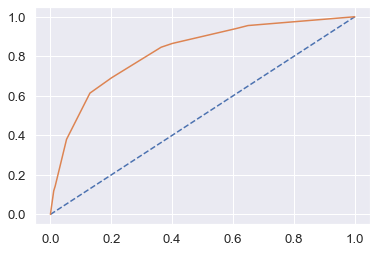

In [245]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

In [246]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.59
cart_train_f1  0.63


AUC: 0.798


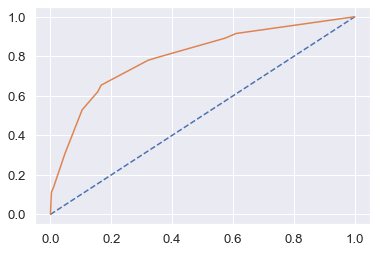

In [247]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [248]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_f1=round(df.loc["1"][2],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_precision=round(df.loc["1"][0],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.51
cart_test_f1  0.59


In [311]:
cart_test_acc = reg_dt_model.score (X_test,test_labels)
cart_test_acc

0.7755555555555556

## Model 3

In [398]:
ytrain_predict = best_grid.predict(X_train)
print('ytrain_predict',ytrain_predict.shape)

ytrain_predict (2100,)


### Accuracy

In [420]:
rf_train_acc = best_grid.score(X_train,train_labels)
rf_train_acc

0.780952380952381

In [421]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1471
           1       0.66      0.56      0.60       629

    accuracy                           0.78      2100
   macro avg       0.74      0.72      0.73      2100
weighted avg       0.77      0.78      0.78      2100



In [422]:
confusion_matrix(train_labels,ytrain_predict)

array([[1290,  181],
       [ 279,  350]], dtype=int64)

AUC: 0.823


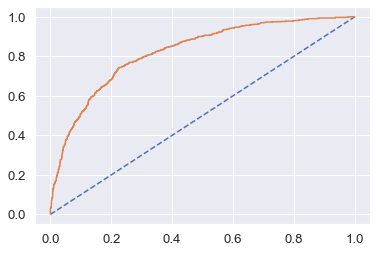

In [423]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)

In [424]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_f1=round(df.loc["1"][2],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_precision=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.66
rf_train_recall  0.56
rf_train_f1  0.6


In [425]:
ytest_predict = best_grid.predict(X_test)
print('ytest_predict',ytest_predict.shape)

ytest_predict (900,)


In [426]:
rf_test_acc = best_grid.score(X_test,test_labels)
rf_test_acc

0.7677777777777778

In [427]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.71      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.75       900



In [428]:
confusion_matrix(test_labels,ytest_predict)

array([[548,  57],
       [152, 143]], dtype=int64)

AUC: 0.788


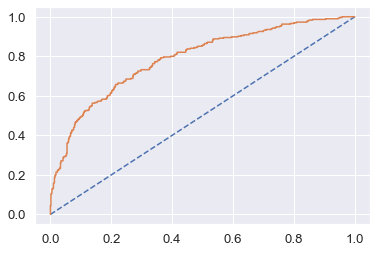

In [407]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)

In [406]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_f1=round(df.loc["1"][2],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_precision=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.72
rf_test_recall  0.48
rf_test_f1  0.58


In [337]:
ytrain_predict = best_grid_ann.predict(X_train)
print('ytrain_predict',ytrain_predict.shape)

ytrain_predict (2100,)


In [338]:
confusion_matrix(train_labels,ytrain_predict)

array([[1290,  181],
       [ 279,  350]], dtype=int64)

In [313]:
ann_train_acc = best_grid.score(X_train,train_labels)
ann_train_acc

0.7895238095238095

In [408]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1471
           1       0.66      0.56      0.60       629

    accuracy                           0.78      2100
   macro avg       0.74      0.72      0.73      2100
weighted avg       0.77      0.78      0.78      2100



## AUC & ROC for the training data for Neural Network Classifier

AUC: 0.820


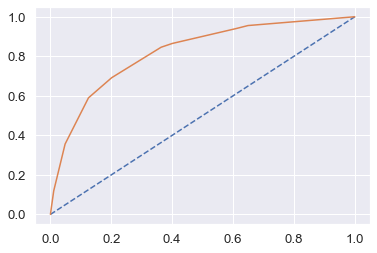

In [301]:
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr)

In [302]:
ytest_predict_ann = best_grid_ann.predict(X_test)
print('ytest_predict_ann',ytest_predict_ann.shape)

ytest_predict_ann (900,)


In [303]:
ann_test_acc = best_grid.score(X_test,test_labels)
ann_test_acc

0.7722222222222223

In [304]:
confusion_matrix(test_labels,ytest_predict)

array([[548,  57],
       [152, 143]], dtype=int64)

AUC: 0.798


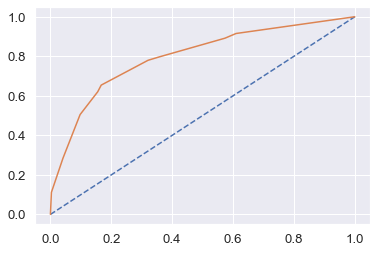

In [305]:
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % ann_test_auc)
# calculate roc curve
ann_test_fpr, ann_test_tpr, ann_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr)

In [339]:
ann_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_test_f1=round(df.loc["1"][2],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_precision=round(df.loc["1"][0],2)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)

ann_test_precision  0.72
ann_test_recall  0.48
ann_test_f1  0.58


In [340]:
ann_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_train_f1=round(df.loc["1"][2],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_precision=round(df.loc["1"][0],2)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

ann_train_precision  0.66
ann_train_recall  0.56
ann_train_f1  0.6


In [451]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.78,0.78,0.77,0.79,0.77
AUC,0.82,0.80,0.82,0.79,0.82,0.80
Recall,0.59,0.51,0.56,0.48,0.56,0.48
Precision,0.67,0.72,0.66,0.72,0.66,0.72
F1 Score,0.63,0.59,0.60,0.58,0.60,0.58
